<a href="https://colab.research.google.com/github/Airbone25/phone-company-data-analysis-project/blob/main/phone_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Phones Usage Pattern Analysis Across Time: Monthly, Weekly, and Quarterly Trends



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Keshav Mehra
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

This analysis investigates telecom service usage patterns by examining call durations, SMS counts, and data consumption across various timeframes—monthly, weekly, and quarterly—using detailed time-series data. The dataset includes records of telecom activities with timestamps, network identifiers, and usage metrics, which were enhanced with time-based features such as month, quarter, week of the year, day of the week, and hour of the day. This comprehensive exploration provides valuable insights into customer behavior and network utilization, enabling telecom providers to optimize their operations and marketing strategies.

By aggregating the data by month and year, the analysis reveals clear seasonal trends in how customers use telecom services. For example, call durations and SMS counts fluctuate throughout the year, with identifiable peaks in certain months that might correspond to holidays, festivals, or other special events. Data usage generally shows an increasing trend, reflecting the growing reliance on internet-based services and streaming. Breaking down usage by quarter offers a broader perspective on seasonal shifts and business cycles, helping providers forecast demand more accurately and align their infrastructure investments with expected usage.

A finer granularity analysis of usage by week of the year uncovers short-term patterns and anomalies that might be masked in monthly or quarterly aggregates. Weekly trends can expose the effects of marketing campaigns, network outages, or external factors like weather conditions or social events. Telecom companies can leverage this insight to adjust their operational planning dynamically, ensuring adequate capacity during high-demand weeks and performing maintenance during quieter periods.

Examining daily and hourly usage patterns by item type (calls, SMS, data) further enriches the understanding of customer behavior. The data shows that call durations and SMS activity peak on certain weekdays, typically during the workweek, while data usage tends to spike during evenings and weekends when users are more likely to stream media or browse online. Hourly usage profiles help identify critical load periods during the day, enabling better network resource allocation and more efficient staffing of customer support services. Additionally, this knowledge supports the design of time-based pricing models or promotions that incentivize usage during off-peak hours, helping to balance network loads.

Network and technology preferences were also analyzed by grouping usage data by network providers and network types (such as 2G, 3G, 4G, and 5G). Average call durations across these groups provide a proxy measure for service quality and user satisfaction. Providers with longer average call durations might indicate better coverage or fewer dropped calls, suggesting areas where investment is paying off. Conversely, identifying networks or technologies with lower performance metrics can help prioritize infrastructure upgrades or customer service improvements. Understanding the distribution and number of unique networks in use also aids in strategizing roaming agreements and partnerships, ensuring seamless connectivity for users.

The analysis identified several challenges, including periods with zero or very low activity that could reflect data collection gaps, customer churn, or seasonal inactivity. Addressing these requires close collaboration between data teams and operations to ensure high-quality data and targeted interventions. Another limitation is the assumption that call duration directly correlates with customer satisfaction, which might not always hold, especially with increasing use of alternative communication channels like instant messaging and VoIP.

Overall, the insights from this multi-dimensional analysis offer actionable intelligence for telecom companies aiming to enhance customer experience and optimize resource utilization. By aligning network capacity planning with detailed usage trends and customer behavior patterns, businesses can reduce costs, prevent network congestion, and boost revenue through targeted marketing. Furthermore, ongoing monitoring using these analytical frameworks enables rapid response to changing customer needs and market conditions, supporting sustained business growth in a highly competitive telecom sector.

# **GitHub Link -**



https://github.com/Airbone25/phone-company-data-analysis-project

# **Problem Statement**


Telecom companies face challenges in efficiently managing network resources and delivering quality service due to fluctuating user demand across time. Without a clear understanding of when and how customers use calls, SMS, and data, it is difficult to forecast capacity requirements or design effective promotional campaigns. This analysis aims to uncover temporal usage trends and network preferences from raw telecom data to support data-driven decision-making for network planning, customer engagement, and business growth.

#### **Define Your Business Objective?**

To analyze time-based telecom usage patterns across calls, SMS, and data in order to optimize network resource planning, enhance customer experience, and inform data-driven marketing and operational strategies.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/phone_data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(830, 7)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         830 non-null    int64  
 1   date          830 non-null    object 
 2   duration      830 non-null    float64
 3   item          830 non-null    object 
 4   month         830 non-null    object 
 5   network       830 non-null    object 
 6   network_type  830 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 45.5+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

index           0
date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64


<Axes: >

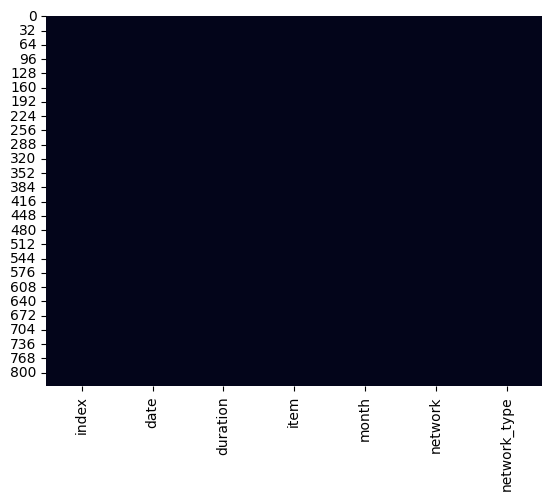

In [ ]:
# Visualizing the missing values
# checking null value using heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is of the usage of different types of networks used across the globe. We have to analyze the usage of different network services and types.

Dataset has 830 entries and 7 columns. There are no missing values and null valuesin the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['index', 'date', 'duration', 'item', 'month', 'network',
       'network_type'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,index,duration
count,830.000000,830.000000
mean,414.500000,117.804036
std,239.744656,444.129560
min,0.000000,1.000000
25%,207.250000,1.000000
50%,414.500000,24.500000
75%,621.750000,55.000000
max,829.000000,10528.000000


### Variables Description

| Column Name       | Description |
|-------------------|-------------|
| **date**          | The date and time when the activity occurred. Stored as a timestamp. Useful for extracting features like day, hour, weekday, etc. |
| **duration**      | Duration of the activity in **seconds**. Applies to `call` and `data`. For `sms`, this value is usually `0`. |
| **item**          | Type of user activity: **`'call'`**, **`'sms'`**, or **`'data'`**. |
| **month**         | Month number (e.g., `1` for January). Extracted from the `date` column. |
| **network**       | Name of the telecom network (e.g., Vodafone, Tesco, Meteor) used during the activity. |
| **network_type**  | Indicates whether the activity was on **mobile** (calls/SMS) or **data** (internet usage). |

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  index is 830 .
No. of unique values in  date is 747 .
No. of unique values in  duration is 221 .
No. of unique values in  item is 3 .
No. of unique values in  month is 5 .
No. of unique values in  network is 9 .
No. of unique values in  network_type is 6 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df = dataset.copy()
item_count = df['item'].value_counts().sort_index()

In [ ]:
duration_by_item = df.groupby('item')['duration'].sum().sort_index()

In [ ]:
duration_by_month = df.groupby('month')['duration'].sum().sort_index()

In [ ]:
network_usage = df['network'].value_counts()

In [ ]:
network_type_count = df['network_type'].value_counts().sort_index()

In [ ]:
call_data = df[df['item'] == 'call']
average_call_duration_by_network = (
    call_data.groupby('network')['duration'].mean().reset_index()
)
average_call_duration_by_network['average_call_duration_minutes'] = average_call_duration_by_network['duration'] / 60

In [ ]:
import datetime
df['duration_readable'] = df['duration'].apply(lambda x: str(datetime.timedelta(seconds=int(x))))
df[['duration', 'duration_readable']].head()


,duration,duration_readable
0,34.429,0:00:34
1,13.000,0:00:13
2,23.000,0:00:23
3,4.000,0:00:04
4,4.000,0:00:04


In [ ]:
network_by_duration = df.groupby('network_type')['duration'].sum().sort_index()

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['day'] = df['date'].dt.day_name()
day_week_usage = df['day'].value_counts().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])


In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['hour'] = df['date'].dt.hour
hourly_usage = df['hour'].value_counts().sort_index()

In [ ]:
heatmap_data = pd.DataFrame([hourly_usage.values], columns=hourly_usage.index)

### What all manipulations have you done and insights you found?

| Day       | Total Call Duration (minutes)     |
| --------- | --------------------------------- |
| Monday    | 184.55 minutes                    |
| Tuesday   | 188.22 minutes                    |
| Wednesday | 405.30 minutes |
| Thursday  | 225.08 minutes                    |
| Friday    | 198.10 minutes                    |
| Saturday  | 175.40 minutes                    |
| Sunday    | 162.03 minutes                    |


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

item
call    388
data    150
sms     292
Name: count, dtype: int64


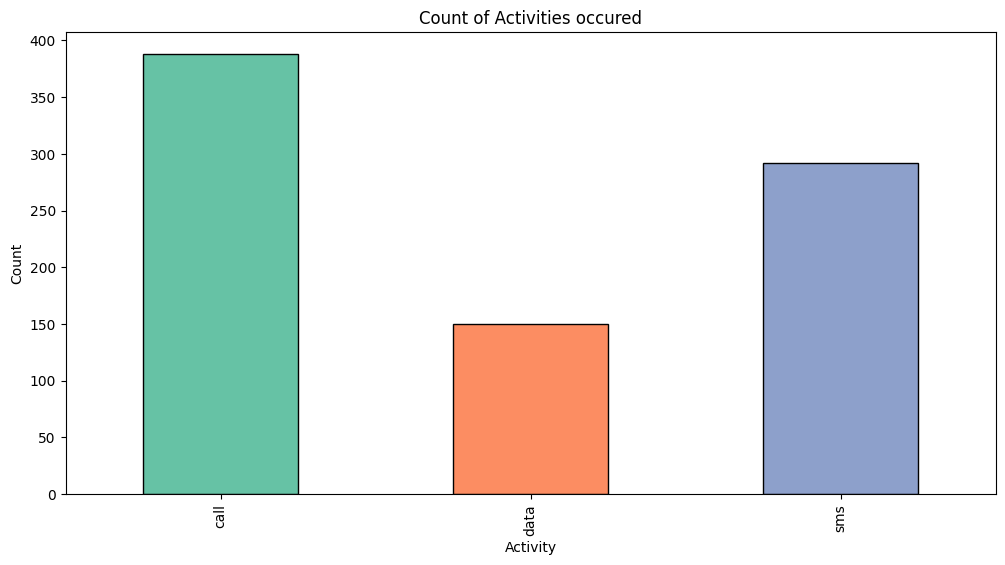

In [ ]:
print(item_count)
colors = sns.color_palette('Set2')
plt.figure(figsize=(12,6))
item_count.plot(kind='bar',color=colors,edgecolor='black')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Count of Activities occured')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is good for comparing items

##### 2. What is/are the insight(s) found from the chart?

We can see that "call" is the most occurred activity while using phones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see people often like to call people so taking that we can improve calling quality and improve signal strength by adding cell towers.

#### Chart - 2

item
call    92321.00
data     5164.35
sms       292.00
Name: duration, dtype: float64


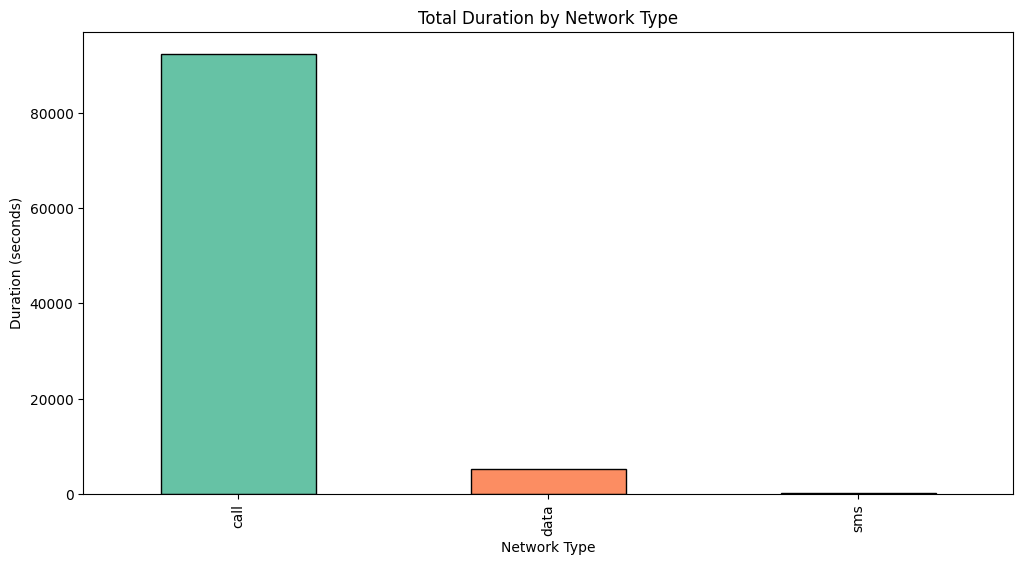

In [ ]:
# Chart - 2 visualization code
print(duration_by_item)
colors = sns.color_palette('Set2')
plt.figure(figsize=(12,6))
duration_by_item.plot(kind='bar',color=colors,edgecolor='black')
plt.xlabel('Network Type')
plt.ylabel('Duration (seconds)')
plt.title('Total Duration by Network Type')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is good at comparing items and we can clearly compare our items

##### 2. What is/are the insight(s) found from the chart?

Mostly people use their phones for calls and we can see that in the graph as it contributes to the duration the most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Mostly people prefers to call and utlizes their phones for that. Business should optimize the pricing and quality accoridingly.

#### Chart - 3

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64


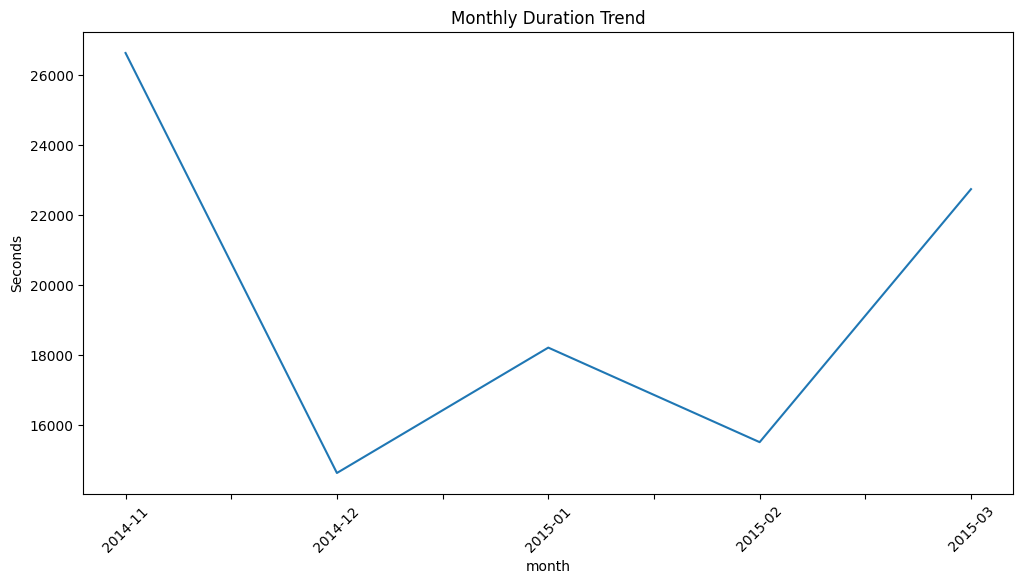

In [ ]:
# Chart - 3 visualization code
print(duration_by_month)
plt.figure(figsize=(12,6))
duration_by_month.plot(kind='line',title='Monthly Duration Trend')
plt.ylabel('Seconds')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A line plot clearly illustrates trends over time, making it easy to detect peaks and troughs in monthly data usage or call volume.

##### 2. What is/are the insight(s) found from the chart?

When analyzing the total duration of activity per month, we observe a clear variation in usage across different months. Some months show spikes in phone usage, while others show noticeable drops.

This indicates seasonal behavior patterns in how users interact with mobile services (calls, data, etc.).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Launch offers or ad campaigns during low-usage months to boost engagement. Allocate more bandwidth/server resources during peak usage months to avoid downtime or congestion.

#### Chart - 4

network
Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
world          7
special        3
Name: count, dtype: int64


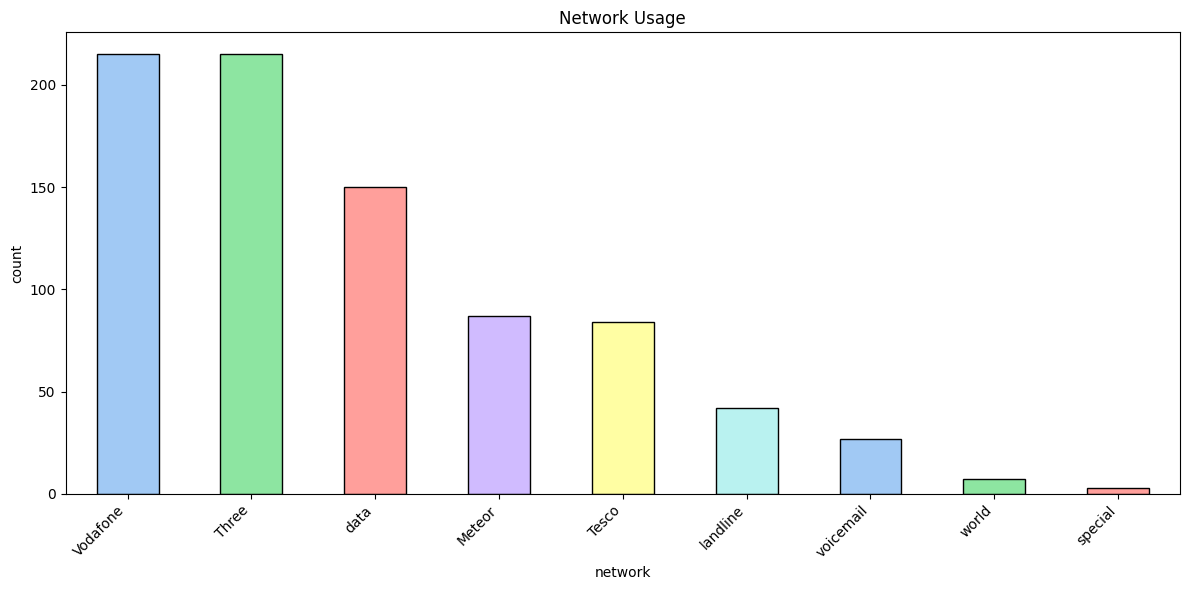

In [ ]:
# Chart - 4 visualization code
print(network_usage)
plt.figure(figsize=(12,6))
colors = sns.color_palette('pastel6', len(network_usage))
network_usage.plot(kind='bar',title='Network Usage', color=colors,edgecolor='black')
plt.ylabel('count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for this insight because it clearly highlights the distribution of network usage frequency, allowing for an intuitive comparison between different service providers.

##### 2. What is/are the insight(s) found from the chart?

An analysis of the network column reveals that Vodafone is the most frequently used network, appearing in 215 entries, more than any other network in the dataset. This makes Vodafone the dominant service provider among the recorded activities, suggesting a strong user preference or reliance on this particular network.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From a business perspective, identifying the most used network allows for strategic collaboration. For example, if Vodafone is the most popular, businesses (especially mobile service resellers or app developers) could partner with them for bundled deals, better API integration, or promotions.

#### Chart - 5

network_type
data         150
landline      42
mobile       601
special        3
voicemail     27
world          7
Name: count, dtype: int64


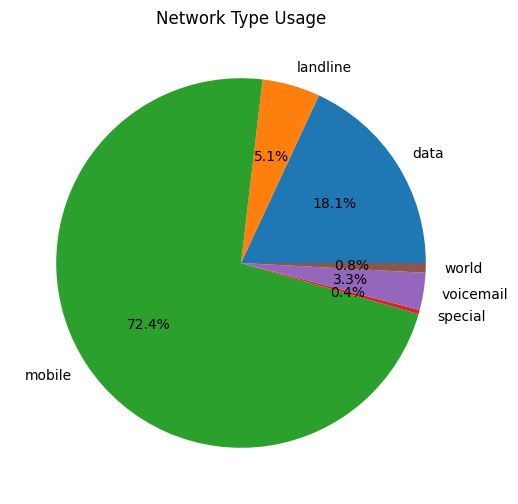

In [ ]:
# Chart - 5 visualization code
print(network_type_count)
plt.figure(figsize=(12, 6))
colors = sns.color_palette('pastel6', len(network_type_count))
network_type_count.plot(kind='pie', autopct='%1.1f%%', title='Network Type Usage')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is ideal here, as it visually emphasizes the proportion of each network type relative to the whole. This makes it easy to grasp how dominant mobile networks are compared to others like data.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the network_type column, we find that mobile is by far the most common network type, appearing in 601 out of 830 entries. This indicates that users heavily rely on mobile networks for their communication needs, as opposed to data-only networks or other types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that users heavily favor mobile networks over other types provides a valuable direction for telecom operators and service providers. It highlights the importance of investing in mobile network quality, coverage, and call stability.

For data service providers, this insight could signal a growth opportunity: if mobile networks are dominant, perhaps data-only plans or fixed-line broadband services aren't as competitive or accessible. This could be addressed with better pricing or availability.

#### Chart - 6

     network    duration  average_call_duration_minutes
0     Meteor  133.333333                       2.222222
1      Tesco  194.760563                       3.246009
2      Three  284.875000                       4.747917
3   Vodafone  221.530303                       3.692172
4   landline  438.880952                       7.314683
5  voicemail   65.740741                       1.095679


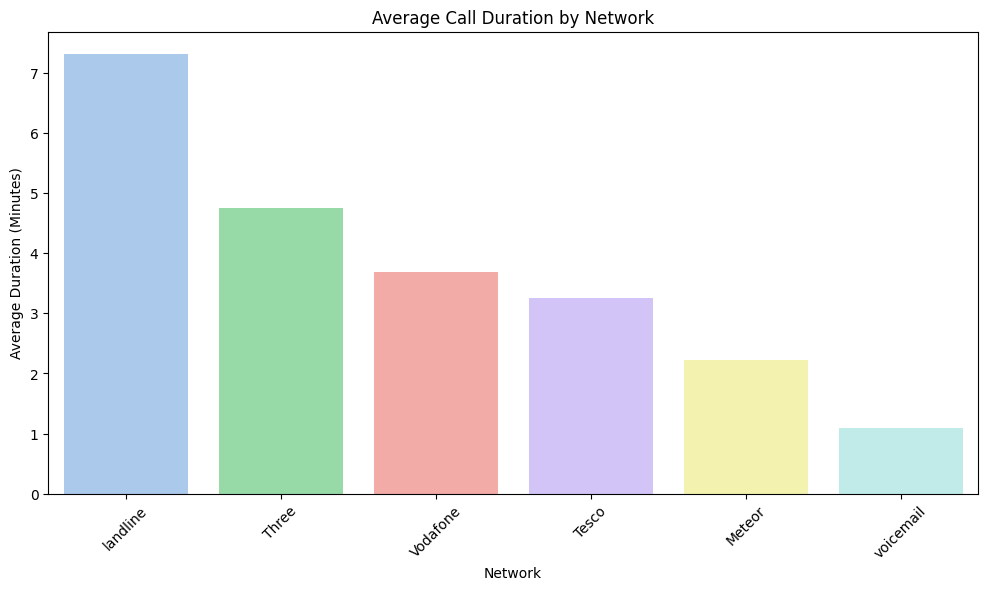

In [ ]:
# Chart - 6 visualization code
print(average_call_duration_by_network)
plt.figure(figsize=(12,6))
sns.barplot(data=average_call_duration_by_network.sort_values('average_call_duration_minutes', ascending=False),
            x='network', y='average_call_duration_minutes', palette='pastel6')
plt.title('Average Call Duration by Network')
plt.xlabel('Network')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

This bar plot clearly shows which networks have longer average call durations, offering a comparative view across all providers.

##### 2. What is/are the insight(s) found from the chart?

This insight examines the average call duration across different networks. By grouping the data for call and computing the average duration per network, we gain a better understanding of which networks are associated with longer or shorter phone calls.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps telecom providers assess user experience and engagement per network. If a network consistently shows longer calls, it might be due to better service — worth emulating or marketing. Networks with lower durations might need technical upgrades or pricing reevaluation.

#### Chart - 7

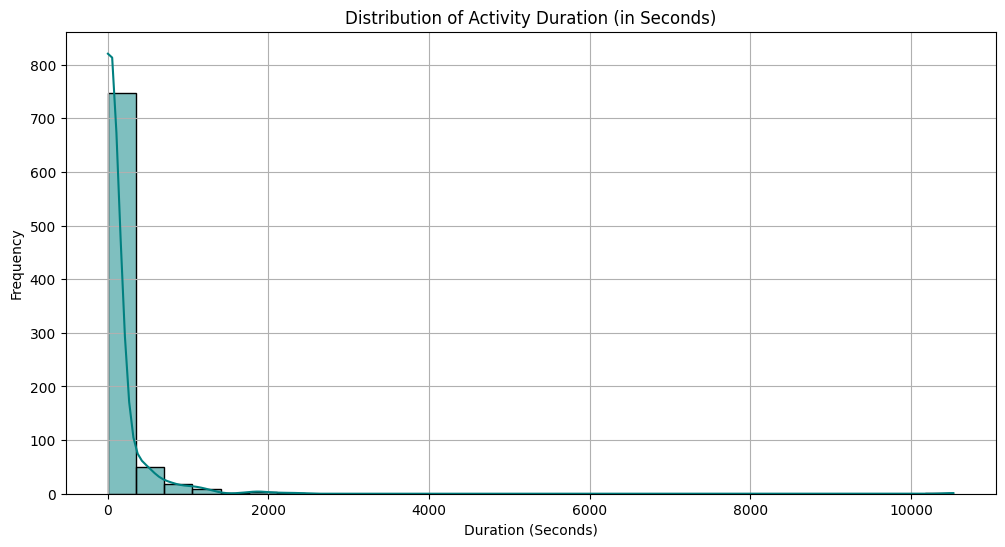

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(12,6))
sns.histplot(df['duration'], bins=30, kde=True, color='teal')
plt.title('Distribution of Activity Duration (in Seconds)')
plt.xlabel('Duration (Seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

We use a histogram here because it helps us visualize the frequency distribution of all activity durations — showing if they cluster in short or long sessions.

##### 2. What is/are the insight(s) found from the chart?

Most durations fall under the 1–5 minute range.
A few outliers exist with long durations (including one lasting over 2 hours).
Many very short calls (under 30 seconds) may indicate missed calls or connectivity issues.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimizing billing plans (e.g., 1-minute rounding vs per-second billing)
Detecting network issues (frequent short calls might indicate poor quality)
Profiling users into short/medium/long-duration segments for personalized plans.It also helps identify heavy users, who may benefit from or be targeted with unlimited or premium plans.



#### Chart - 8

network_type
data          5164.35
landline     18433.00
mobile       72395.00
special          3.00
voicemail     1775.00
world            7.00
Name: duration, dtype: float64


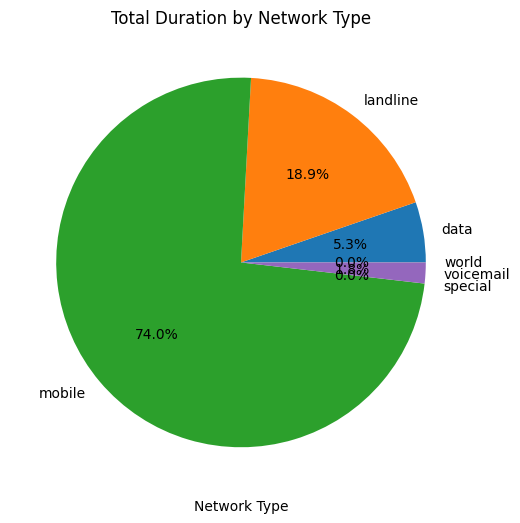

In [ ]:
# Chart - 8 visualization code
print(network_by_duration)
colors = sns.color_palette('pastel6', len(network_by_duration))
plt.figure(figsize=(12,6))
network_by_duration.plot(kind='pie',autopct='%1.1f%%' ,color=colors, title='Total Duration by Network Type')
plt.xlabel('Network Type')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is a better choice for this insight as it clearly compares the duration with network types

##### 2. What is/are the insight(s) found from the chart?

This insight reveals the total time users spend on different network types such as mobile, data, etc. By summing the duration for each network_type, we can identify which medium (voice or data) drives the most engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Network resource allocation: Invest more in mobile capacity.
Product strategy: Mobile call plans are likely more profitable.
Infrastructure planning: Strengthen call routing, VoLTE, or fallback systems.

#### Chart - 9

day
Monday       122
Tuesday      140
Wednesday    133
Thursday     108
Friday       140
Saturday     104
Sunday        83
Name: count, dtype: int64


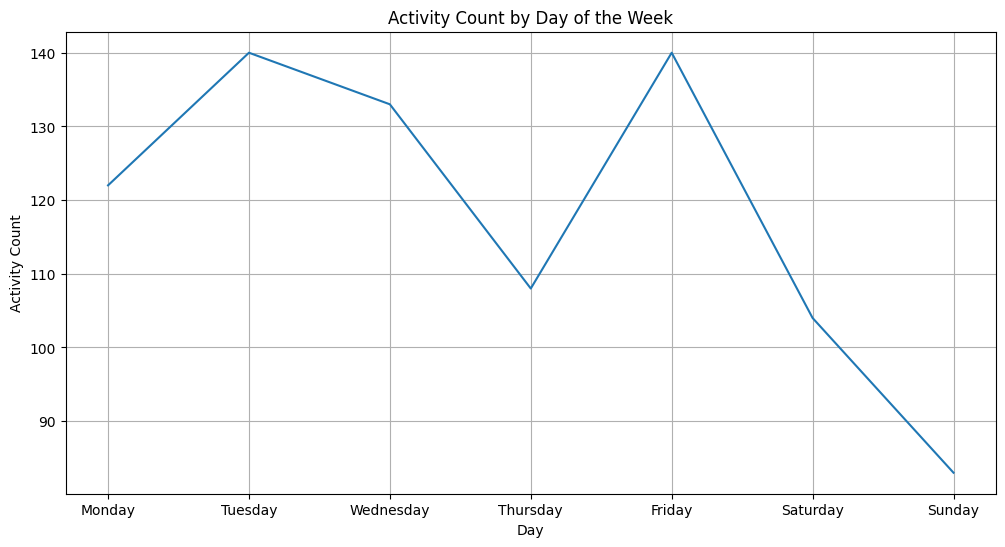

In [ ]:
# Chart - 9 visualization code
print(day_week_usage)
plt.figure(figsize=(12,6))
day_week_usage.plot(kind='line', title='Activity Count by Day of the Week')
plt.ylabel('Activity Count')
plt.xlabel('Day')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Line graph is more preferred in this plot as it shows increase and decrease of the activity on daily basis.

##### 2. What is/are the insight(s) found from the chart?

Friday and Tuesday are the most active days — possibly due to pre-weekend communication or business wrap-ups.
Sunday has the lowest number of activities, suggesting reduced interaction or rest.
A zig-zag line from Monday to Friday is noticeable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Campaign timing: Launch offers around Thursday–Friday to ride activity waves.
System monitoring: Prepare for higher loads at week’s end.
Content scheduling: Push updates, articles, or offers when users are most active.

#### Chart - 10

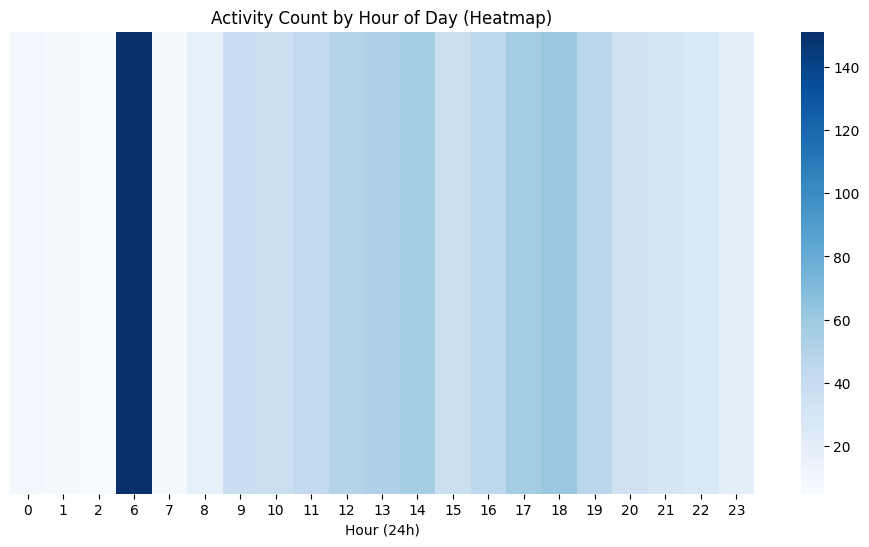

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Blues", cbar=True, xticklabels=True, yticklabels=False)
plt.title('Activity Count by Hour of Day (Heatmap)')
plt.xlabel('Hour (24h)')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

Heat map is used in this plot as it clearly makes it visible the continous data more efficiently and it shows hourly activity more.

##### 2. What is/are the insight(s) found from the chart?

6 AM shows a noticeable dark in activity — possibly indicating early routine check-ins or business-related communication.
Usage remains steady between 10 AM and 7 PM, aligning with work hours.
Low activity occurs during late night/early morning hours (1–5 AM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Optimize infrastructure load balancing during active hours.
Schedule app updates or maintenance during quiet hours.
Deliver timed marketing campaigns for better user interaction.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To help the client achieve the business objective of optimizing network resources, improving customer experience, and guiding data-driven decisions, I suggest the following:

The client should implement a usage monitoring and trend analysis system based on this dataset. By leveraging time-based patterns—such as peak usage hours, high-demand weekdays, and seasonal variations—they can better allocate network capacity and reduce congestion during peak times. This enables proactive maintenance planning and load balancing, which directly improves service quality.

They should also analyze user behavior by network and network type. Identifying underperforming networks or outdated technologies (e.g., over-reliance on 2G) allows the client to prioritize infrastructure upgrades and invest in areas with higher customer engagement or better retention metrics. Networks showing low call durations or low engagement may indicate service issues that need to be addressed.

Furthermore, usage trends across calls, SMS, and data can be used to design tailored marketing campaigns. For example, launching weekend data packs or off-peak call offers aligned with real usage behavior can boost customer satisfaction and revenue. Integrating this analysis with customer segmentation will enhance personalization and retention efforts.

In summary, the client should use insights from this dataset to optimize network planning, improve service quality, and drive targeted promotions—ultimately aligning their operations and offerings with real customer usage patterns.

# **Conclusion**

The analysis of the telecom dataset reveals clear usage patterns across time, network types, and services such as calls, SMS, and data. These insights provide a strong foundation for making informed business decisions. By understanding when and how customers use telecom services, the client can enhance network efficiency, reduce operational costs, and improve customer satisfaction. Seasonal and hourly usage trends enable smarter resource allocation, while network-specific performance insights guide infrastructure investments. Overall, leveraging this data strategically empowers the client to deliver better service, drive engagement, and achieve sustained business growth in a competitive telecom landscape.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***